# Make toy dataset for regression problem

In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import pandas as pd

np.random.seed(42)
N_train = 50
N_test = 100
scale = 3
eps_train = np.random.normal(0, scale, 3*N_train)
eps_test = np.random.normal(0, scale, N_test)
x_train1 = np.random.uniform(-4, -3, N_train)
x_train2 = np.random.uniform(0, 2, N_train)
x_train3 = np.random.uniform(5, 6, N_train)
x_test = np.linspace(-5, 7, N_test)
y_train1 = x_train1**3 + eps_train[:N_train]
y_train2 = x_train2**3 + eps_train[N_train:2*N_train]
y_train3 = x_train3**3 + eps_train[2*N_train:]
x_train = np.concatenate([x_train1, x_train2, x_train3])
y_train = np.concatenate([y_train1, y_train2, y_train3])
y_test = x_test**3 + eps_test

data_train = pd.DataFrame({'x': x_train, 'y': y_train})
data_test = pd.DataFrame({'x': x_test, 'y': y_test})

data_train.to_csv('data/toy_data2_train.csv', index=False)
data_test.to_csv('data/toy_data2_test.csv', index=False)

epoch 0, loss 10036.6279296875
epoch 50, loss 781.6751098632812
epoch 100, loss 492.30157470703125
epoch 150, loss 305.6227722167969
epoch 200, loss 240.91099548339844
epoch 250, loss 219.53245544433594
epoch 300, loss 203.82879638671875
epoch 350, loss 188.79351806640625
epoch 400, loss 174.94908142089844
epoch 450, loss 161.79501342773438
epoch 500, loss 149.51065063476562
epoch 550, loss 138.0887451171875
epoch 600, loss 127.60242462158203
epoch 650, loss 118.33737182617188
epoch 700, loss 110.46957397460938
epoch 750, loss 103.91445922851562
epoch 800, loss 98.5219497680664
epoch 850, loss 93.9341049194336
epoch 900, loss 89.934814453125
epoch 950, loss 86.14537048339844
epoch 1000, loss 82.43242645263672
epoch 1050, loss 78.57037353515625
epoch 1100, loss 74.55655670166016
epoch 1150, loss 70.40873718261719
epoch 1200, loss 66.1027603149414
epoch 1250, loss 61.64699172973633
epoch 1300, loss 57.07157516479492
epoch 1350, loss 52.4407958984375
epoch 1400, loss 47.80756759643555
epo

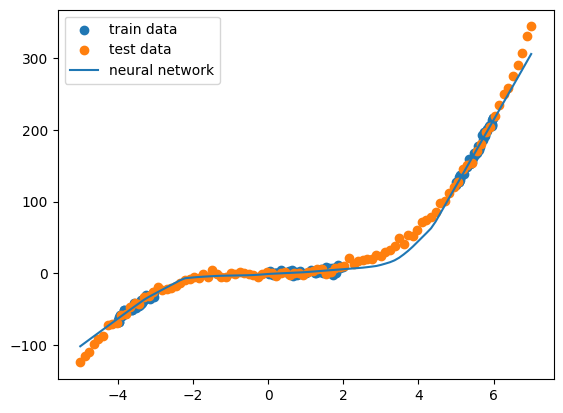

In [5]:
#make neural network with hidden layers and 50 nodes in each layer, relu activation function

hidden_layers = 1
hidden_nodes = 100
input_nodes = 1
output_nodes = 1

class SimpleNet(torch.nn.Module):
    def __init__(self):
        super(SimpleNet, self).__init__()
        self.fc1 = torch.nn.Linear(input_nodes, hidden_nodes)
        self.fc2 = torch.nn.Linear(hidden_nodes, output_nodes)

    def forward(self, x):
        x = torch.nn.functional.relu(self.fc1(x))
        x = self.fc2(x)
        return x
    
net = SimpleNet()

#train the neural network
criterion = torch.nn.MSELoss()
optimizer = torch.optim.Adam(net.parameters(), lr=0.01)

x_train = torch.tensor(pd.read_csv('data/toy_data2_train.csv')['x'].values).float().view(-1, 1)
y_train = torch.tensor(pd.read_csv('data/toy_data2_train.csv')['y'].values).float().view(-1, 1)
x_test = torch.tensor(pd.read_csv('data/toy_data2_test.csv')['x'].values).float().view(-1, 1)
y_test = torch.tensor(pd.read_csv('data/toy_data2_test.csv')['y'].values).float().view(-1, 1)

for epoch in range(5000):
    optimizer.zero_grad()
    output = net(x_train)
    loss = criterion(output, y_train)
    loss.backward()
    optimizer.step()

    if epoch % 50 == 0:
        print('epoch {}, loss {}'.format(epoch, loss.item()))

#test error
output = net(x_test)
test_loss = criterion(output, y_test)
print('test loss', test_loss.item())

#plot the results
plt.figure()
plt.scatter(x_train, y_train, label='train data')
plt.scatter(x_test, y_test, label='test data')
plt.plot(x_test, net(x_test).detach().numpy(), label='neural network')
plt.legend()

#save the model
torch.save(net.state_dict(), 'checkpoints/SimpleNet_toy_data2.pth')
